<a href="https://colab.research.google.com/github/oliviapang/scratchpad/blob/main/Class_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/oliviapang/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 45 (delta 10), reused 5 (delta 5), pack-reused 28 (from 1)
Receiving objects: 100% (45/45), 371.84 KiB | 7.44 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Download complete
Extracting data files...
Data extracted


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/data/cars_env.csv')
df.head()

def minmax(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

In [11]:
df['EPA class'].value_counts()

,count
EPA class,
SUV,160
SUBCOMPACT CARS,77
MIDSIZE CARS,65
STANDARD PICKUP TRUCKS,53
COMPACT CARS,47
LARGE CARS,37
TWO SEATERS,27
SMALL PICKUP TRUCKS,18
SMALL STATION WAGONS,15


In [14]:
y = df['EPA class']
x = df.loc[:,['footprint', 'baseline price']]
x.describe()
u = x.apply(minmax)
u.describe()

,footprint,baseline price
count,524.000000,524.000000
mean,0.312090,0.023150
std,0.193966,0.052077
min,0.000000,0.000000
25%,0.183982,0.007797
50%,0.259029,0.012050
75%,0.389783,0.022760
max,1.000000,1.000000


In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model = model.fit(u,y)
y_hat = model.predict(u)
y_hat

array(['SUV', 'SUBCOMPACT CARS', 'MIDSIZE CARS', 'SUV', 'MIDSIZE CARS',
       'COMPACT CARS', 'MIDSIZE CARS', 'SMALL STATION WAGONS',
       'SMALL STATION WAGONS', 'COMPACT CARS', 'COMPACT CARS',
       'SUBCOMPACT CARS', 'SUBCOMPACT CARS', 'COMPACT CARS',
       'SUBCOMPACT CARS', 'LARGE CARS', 'LARGE CARS', 'LARGE CARS',
       'LARGE CARS', 'LARGE CARS', 'SUV', 'SUBCOMPACT CARS',
       'SUBCOMPACT CARS', 'SUBCOMPACT CARS', 'SUBCOMPACT CARS',
       'MIDSIZE CARS', 'TWO SEATERS', 'TWO SEATERS', 'COMPACT CARS',
       'SUBCOMPACT CARS', 'SUBCOMPACT CARS', 'SUBCOMPACT CARS',
       'SUBCOMPACT CARS', 'SUBCOMPACT CARS', 'SUBCOMPACT CARS',
       'SUBCOMPACT CARS', 'SMALL STATION WAGONS', 'SUBCOMPACT CARS',
       'COMPACT CARS', 'COMPACT CARS', 'COMPACT CARS', 'COMPACT CARS',
       'SMALL STATION WAGONS', 'SUBCOMPACT CARS', 'SUBCOMPACT CARS',
       'SUBCOMPACT CARS', 'COMPACT CARS', 'SUBCOMPACT CARS',
       'MIDSIZE CARS', 'MIDSIZE CARS', 'MIDSIZE CARS', 'MIDSIZE CARS',
       'MI

In [21]:
pd.crosstab(y, y_hat, margins=True, normalize=True)

col_0,COMPACT CARS,LARGE CARS,MIDSIZE CARS,MINIVAN,SMALL PICKUP TRUCKS,SMALL STATION WAGONS,STANDARD PICKUP TRUCKS,SUBCOMPACT CARS,SUV,TWO SEATERS,VANS,All
EPA class,,,,,,,,,,,,
COMPACT CARS,0.049618,0.001908,0.009542,0.000000,0.000000,0.005725,0.000000,0.007634,0.015267,0.000000,0.000000,0.089695
LARGE CARS,0.003817,0.051527,0.003817,0.000000,0.000000,0.000000,0.000000,0.000000,0.011450,0.000000,0.000000,0.070611
MIDSIZE CARS,0.003817,0.009542,0.074427,0.000000,0.001908,0.000000,0.000000,0.009542,0.024809,0.000000,0.000000,0.124046
MIDSIZE STATION WAGONS,0.000000,0.001908,0.003817,0.000000,0.000000,0.000000,0.000000,0.001908,0.001908,0.000000,0.000000,0.009542
MINIVAN,0.000000,0.000000,0.001908,0.009542,0.000000,0.000000,0.000000,0.000000,0.001908,0.000000,0.000000,0.013359
SMALL PICKUP TRUCKS,0.000000,0.000000,0.001908,0.003817,0.028626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034351
SMALL STATION WAGONS,0.005725,0.000000,0.000000,0.000000,0.000000,0.015267,0.000000,0.001908,0.005725,0.000000,0.000000,0.028626
STANDARD PICKUP TRUCKS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.097328,0.000000,0.003817,0.000000,0.000000,0.101145
SUBCOMPACT CARS,0.009542,0.000000,0.005725,0.000000,0.000000,0.005725,0.000000,0.108779,0.015267,0.001908,0.000000,0.146947


In [22]:
model.score(u,y)

0.7137404580152672

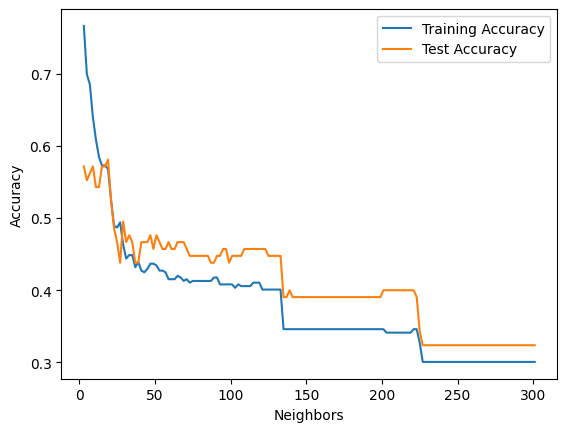

In [33]:
from sklearn.model_selection import train_test_split
u_train, u_test, y_train, y_test = train_test_split(u,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes
k_grid = np.array([ (2*k+3) for k in range(0,150)]) # Odd number grid
test_accuracies = []
train_accuracies = []
for k in k_grid: # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(u_train,y_train) # Fit the model
    y_hat = model.predict(u_test) # Predict values
    test_acc = model.score(u_test,y_test) # Compute test accuracy
    train_acc = model.score(u_train,y_train) # Compute trainin accuracy
    #print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc) # Save test results
    train_accuracies.append(train_acc) # Save training results

sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

In [29]:
df = pd.read_csv('/content/data/land_mines.csv')
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [38]:
y = df['mine_type']
x = df.loc[:,['voltage', 'height']]
u = x.apply(minmax)
#model = KNeighborsClassifier(n_neighbors = 5)
#model = model.fit(u,y)
#_hat = model.predict(u)
#print(pd.crosstab(y, y_hat))

from sklearn.model_selection import train_test_split
u_train, u_test, y_train, y_test = train_test_split(u,y,
                                                    test_size=.2,
                                                    random_state=100)
# Set the number of neighbors, typically odd to "break ties":
k = 5
# Create a fitted model instance:
model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
model = model.fit(u_train,y_train) # Fit the model, training set
y_hat = model.predict(u_test) # Predictions, test set
print( pd.crosstab(y_test, y_hat)) # Confusion matrix
model.score(u_test,y_test) # Test accuracy

k_grid = np.array([ (2*k+3) for k in range(0,150)]) # Odd number grid
test_accuracies = []
train_accuracies = []
for k in k_grid: # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(u_train,y_train) # Fit the model
    y_hat = model.predict(u_test) # Predict values
    test_acc = model.score(u_test,y_test) # Compute test accuracy
    train_acc = model.score(u_train,y_train) # Compute trainin accuracy
    #print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc) # Save test results
    train_accuracies.append(train_acc) # Save training results

sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

col_0       1   2  3  4  5
mine_type                 
1          10   0  2  1  0
2           0  11  2  0  1
3           2   2  5  2  3
4           7   1  2  2  4
5           2   0  5  1  3


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 271, n_samples_fit = 270, n_samples = 68